In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# scaling - important in SVMs
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state = 42)

svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [10]:
svc.predict(sc.transform([[30, 87000]]))

array([0])

In [11]:
y_pred = svc.predict(X_test)

In [14]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)), axis = 1)

array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1,

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[50,  2],
       [ 9, 19]])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8625

/var/folders/9c/tw5l79697m9_ccbr5fmrv42m0000gn/T/ipykernel_6941/2523229614.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)


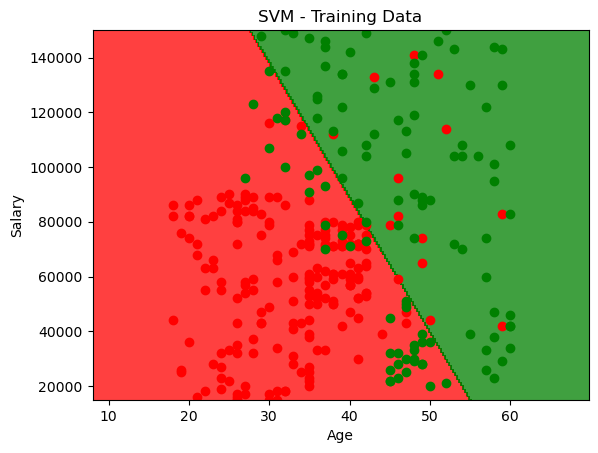

In [18]:
# Predicting train set
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:, 0].max() + 10,step = 0.25), 
                     np.arange(start = X_set[:,1].min() - 10, stop = X_set[:, 1].max() + 10,step = 0.25))
plt.contourf(X1, X2, svc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
             , alpha = 0.75, cmap = ListedColormap(['r','g']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)

plt.title("SVM - Training Data")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend
plt.show()

Since we chose our kernel as linear, it did not increase the accuracy much(similar to logistic regression)...let's try different kernels and see

/var/folders/9c/tw5l79697m9_ccbr5fmrv42m0000gn/T/ipykernel_6941/2040736401.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)


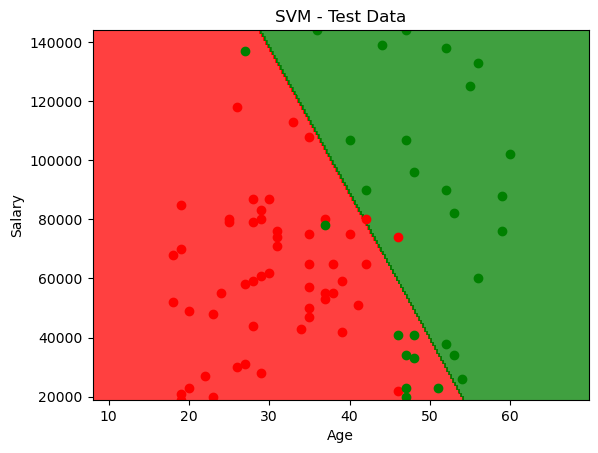

In [19]:
# Predicting test set
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:, 0].max() + 10,step = 0.25), 
                     np.arange(start = X_set[:,1].min() - 10, stop = X_set[:, 1].max() + 10,step = 0.25))
plt.contourf(X1, X2, svc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
             , alpha = 0.75, cmap = ListedColormap(['r','g']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)

plt.title("SVM - Test Data")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend
plt.show()